In [1]:
# ========== ----- ========== Import Libraries ========== ----- ========== #

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from joblib import dump, load

# from mlxtend.plotting import plot_decision_regions 

# ========== ----- ========== End ========== ----- ========== #

In [2]:
# ========== ----- ========== Import Dataset ========== ----- ========== #

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_df.csv')

# get the number of rows and columns
num_rows, num_cols = df.shape

print('Number of Rows: ', num_rows)
print('Number of Columns: ', num_cols, "\n")

# Display the first few rows of the DataFrame
print(df.head())

# ========== ----- ========== End ========== ----- ========== #


Number of Rows:  135493
Number of Columns:  50 

   client_catg  target  avg_elec_reading_remarque  \
0           11       0                   6.971429   
1           11       0                   7.216216   
2           11       0                   7.055556   
3           11       0                   6.150000   
4           11       0                   8.857143   

   avg_elec_consommation_level_1  avg_elec_consommation_level_2  \
0                     352.400000                      10.571429   
1                     557.540541                       0.000000   
2                     798.611111                      37.888889   
3                       1.200000                       0.000000   
4                     663.714286                     104.857143   

   avg_elec_consommation_level_3  avg_elec_consommation_level_4  \
0                       0.000000                       0.000000   
1                       0.000000                       0.000000   
2                       0.00

0    127927
1      7566
Name: target, dtype: int64


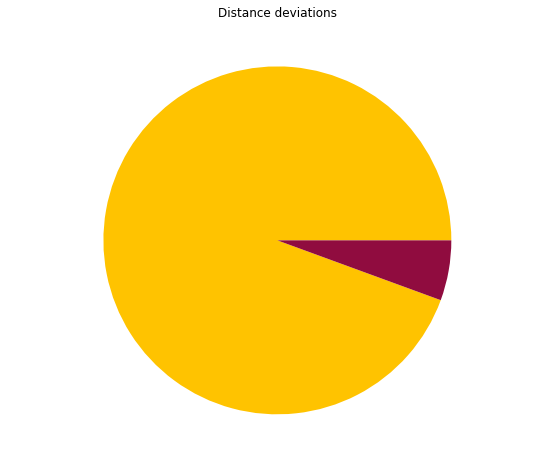

In [3]:
# ========== ----- ========== Traget Column Analysis ========== ----- ========== #

# get the values of Target and their counts
target_counts = df['target'].value_counts()
print(target_counts)

# Create a pie chart
custom_colors = ['#FFC300', '#900C3F']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(target_counts, labels=["Unfraud", "Fraud"],
       colors=custom_colors, labeldistance=1.2, textprops={'color': 'white', 'fontsize': 16})
# Add a title
plt.title('Distance deviations')
# Show the chart
plt.show()

# ========== ----- ========== End ========== ----- ========== #


In [4]:
# ========== ----- ========== SVM Model ========== ----- ========== #

df_copy = df.copy()
X = df_copy.drop('target', axis=1)
y = df['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = svm.SVC()
model.fit(X_train, y_train)

# Save the trained model to a file
dump(model, 'svm_model.joblib')

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# ========== ----- ========== End ========== ----- ========== #


In [5]:
# ========== ----- ========== Test SVM Model ========== ----- ========== #

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy)

# ========== ----- ========== End ========== ----- ========== #


[[25535     0]
 [ 1564     0]]
Accuracy: 0.942285693199011
